In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

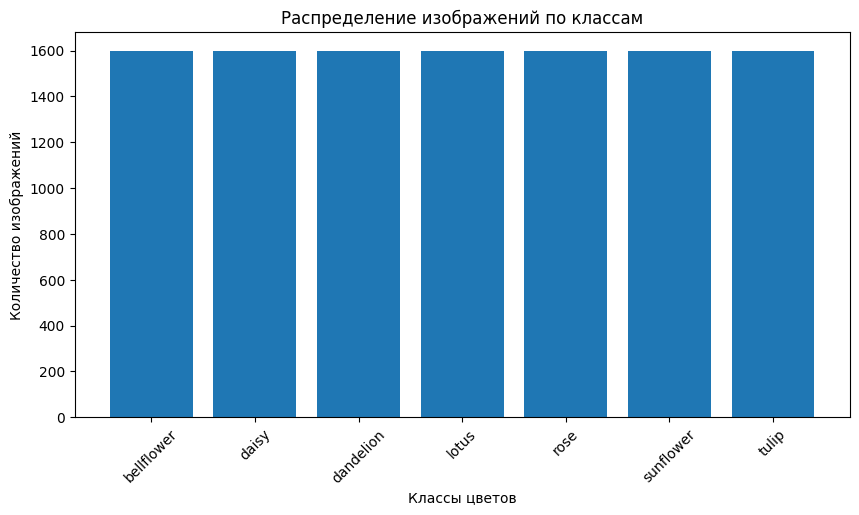

Средний размер изображения: 340.4585714285714x287.3542857142857
Минимальный размер: 159x129
Максимальный размер: 1300x1329


In [4]:
data_dir = 'flowers'
classes = ['bellflower', 'daisy', 'dandelion', 'lotus', 'rose', 'sunflower', 'tulip']

image_counts = {}
image_sizes = []

for flower_class in classes:
    class_dir = os.path.join(data_dir, flower_class)
    image_counts[flower_class] = len(os.listdir(class_dir))
    
    for img_name in os.listdir(class_dir)[:100]:
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title('Распределение изображений по классам')
plt.xlabel('Классы цветов')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.show()

widths, heights = zip(*image_sizes)
print(f"Средний размер изображения: {np.mean(widths)}x{np.mean(heights)}")
print(f"Минимальный размер: {np.min(widths)}x{np.min(heights)}")
print(f"Максимальный размер: {np.max(widths)}x{np.max(heights)}")

# Выводы:
# 1. Датесет сбалансирован - по 1600 изображений на каждый класс
# 2. Размеры изображений варьируются, потребуется стандартизация
# 3. Необходима аугментация данных для улучшения обобщающей способности модели

In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [9]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = len(classes)

# Генераторы данных с аугментацией
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% данных для валидации
)

# Генератор для тренировочных данных
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Генератор для валидационных данных
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 8960 images belonging to 7 classes.
Found 2240 images belonging to 7 classes.


c:\Users\anmrt\Desktop\termpaper_6sem\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,113,031 (19.50 MB)

 Trainable params: 5,112,071 (19.50 MB)

 Non-trainable params: 960 (3.75 KB)

c:\Users\anmrt\Desktop\termpaper_6sem\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 115s 400ms/step - accuracy: 0.3749 - loss: 3.4478 - val_accuracy: 0.1437 - val_loss: 4.5025 - learning_rate: 0.0010
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 91s 323ms/step - accuracy: 0.5053 - loss: 1.3916 - val_accuracy: 0.4531 - val_loss: 1.6408 - learning_rate: 0.0010
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 88s 314ms/step - accuracy: 0.5675 - loss: 1.2377 - val_accuracy: 0.5375 - val_loss: 1.2010 - learning_rate: 0.0010
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 88s 313ms/step - accuracy: 0.5914 - loss: 1.1365 - val_accuracy: 0.4513 - val_loss: 2.7655 - learning_rate: 0.0010
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 151s 541ms/step - accuracy: 0.6331 - loss: 1.0634 - val_accuracy: 0.6545 - val_loss: 1.0905 - learning_rate: 0.0010
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 87s 312ms/step - accuracy: 0.6609 - loss: 0.9899 - val_accuracy: 0.5607 - val_loss: 1.3172 - learning_rate: 0.0010
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 171s 612ms/step - accuracy: 

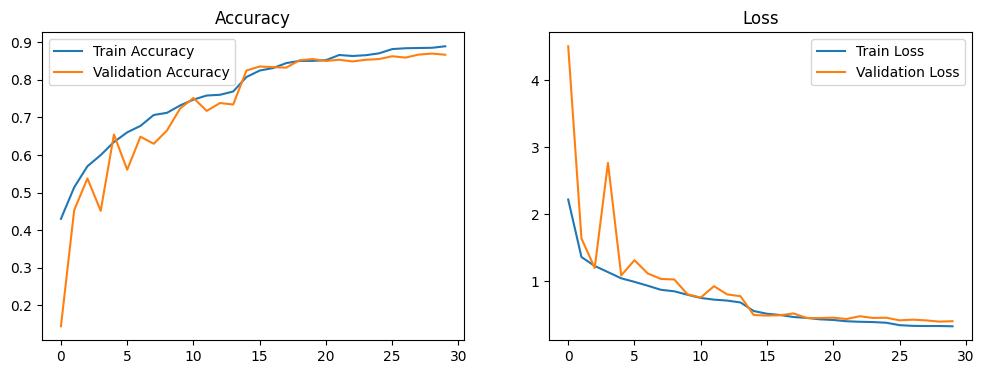

In [10]:
def build_model1(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model1 = build_model1()
model1.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


history1 = model1.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)


def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

plot_history(history1)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.6406 - loss: 1.0385 - val_accuracy: 0.8263 - val_loss: 0.5019 - learning_rate: 0.0010
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 194ms/step - accuracy: 0.8181 - loss: 0.5320 - val_accuracy: 0.8397 - val_loss: 0.4746 - learning_rate: 0.0010
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 67s 238ms/step - accuracy: 0.8355 - loss: 0.4852 - val_accuracy: 0.8442 - val_loss: 0.4599 - learning_rate: 0.0010
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - accuracy: 0.8506 - loss: 0.4373 - val_accuracy: 0.8540 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 51s 181ms/step - accuracy: 0.8619 - loss: 0.4003 - val_accuracy: 0.8469 - val_loss: 0.4525 - learning_rate: 0.0010
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 49s 173ms/step - accuracy: 0.8585 - loss: 0.3998 - val_accuracy: 0.8500 - val_loss: 0.4383 - learning_rate: 0.0010
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 48s 171ms/step - accuracy: 0.8

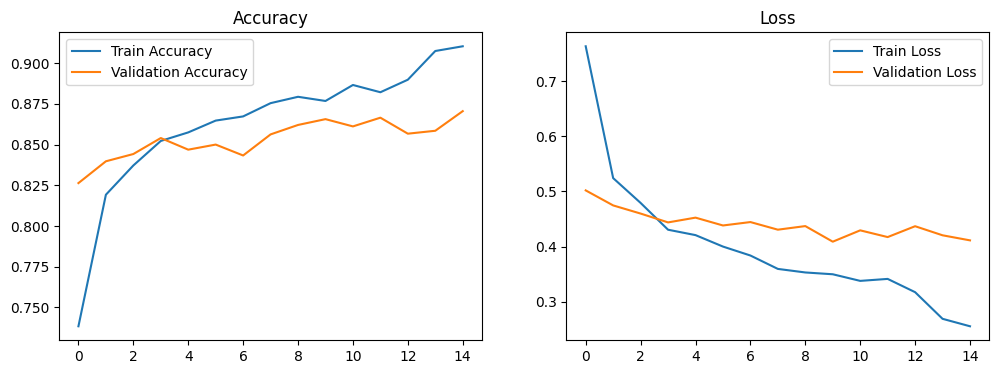

In [11]:
def build_model2(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES):
    base_model = applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    
    # Заморозка базовой модели
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model2 = build_model2()
model2.summary()

history2 = model2.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

plot_history(history2)

Found 2240 images belonging to 7 classes.
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step
              precision    recall  f1-score   support

  bellflower       0.91      0.99      0.95       320
       daisy       0.95      0.93      0.94       320
   dandelion       0.87      0.92      0.89       320
       lotus       0.95      0.84      0.89       320
        rose       0.92      0.83      0.87       320
   sunflower       0.92      0.95      0.93       320
       tulip       0.82      0.88      0.85       320

    accuracy                           0.90      2240
   macro avg       0.91      0.90      0.90      2240
weighted avg       0.91      0.90      0.90      2240



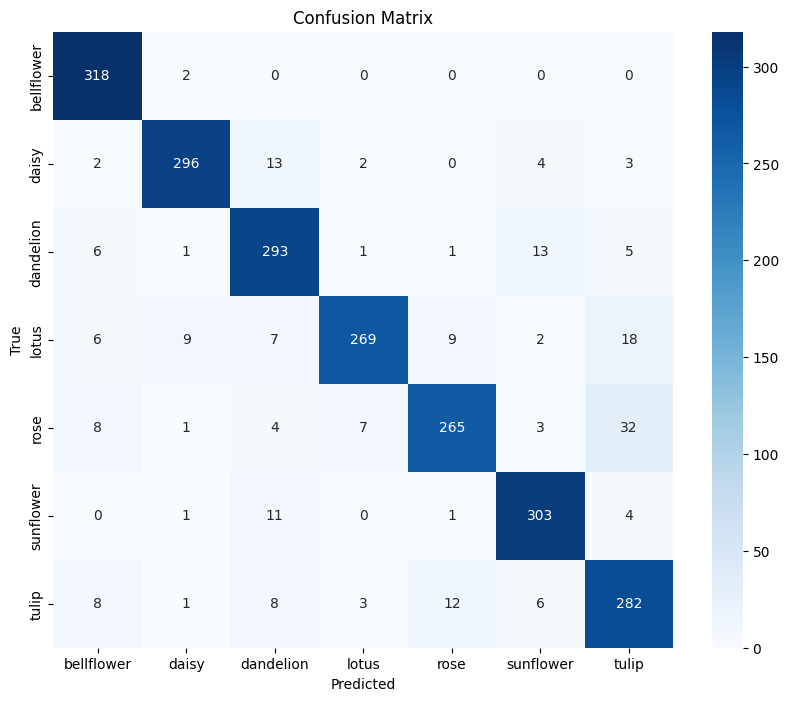

Оценка Model 1:
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
              precision    recall  f1-score   support

  bellflower       0.90      0.97      0.93       320
       daisy       0.90      0.85      0.88       320
   dandelion       0.81      0.88      0.84       320
       lotus       0.92      0.85      0.88       320
        rose       0.82      0.80      0.81       320
   sunflower       0.93      0.93      0.93       320
       tulip       0.83      0.81      0.82       320

    accuracy                           0.87      2240
   macro avg       0.87      0.87      0.87      2240
weighted avg       0.87      0.87      0.87      2240


Оценка Model 2:
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step
              precision    recall  f1-score   support

  bellflower       0.86      0.94      0.90       320
       daisy       0.90      0.88      0.89       320
   dandelion       0.83      0.88      0.85       320
       lotus       0.92      0.78      0.84       320
        rose       

In [12]:
class VotingEnsemble:
    def __init__(self, models):
        self.models = models
    
    def predict(self, x):
        predictions = [model.predict(x) for model in self.models]
        
        # Голосование
        avg_predictions = np.mean(predictions, axis=0)
        return np.argmax(avg_predictions, axis=1)
    
    def evaluate(self, x, y_true):
        y_pred = self.predict(x)
        y_true = np.argmax(y_true, axis=1)
        
        print(classification_report(y_true, y_pred, target_names=classes))
        
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=classes, yticklabels=classes)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Создаем ансамбль из двух моделей
ensemble = VotingEnsemble([model1, model2])

# Оценка ансамбля на валидационных данных
# Нужно перезагрузить валидационные данные без shuffle для корректной оценки
val_generator_no_shuffle = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Получаем все валидационные данные
x_val, y_val = [], []
for i in range(len(val_generator_no_shuffle)):
    x, y = val_generator_no_shuffle[i]
    x_val.append(x)
    y_val.append(y)
x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

# Оценка ансамбля
ensemble.evaluate(x_val, y_val)

print("Оценка Model 1:")
y_pred1 = np.argmax(model1.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)
print(classification_report(y_true, y_pred1, target_names=classes))

print("\nОценка Model 2:")
y_pred2 = np.argmax(model2.predict(x_val), axis=1)
print(classification_report(y_true, y_pred2, target_names=classes))

In [13]:
model1_acc = history1.history['val_accuracy'][-1]
model2_acc = history2.history['val_accuracy'][-1]
ensemble_acc = np.mean(ensemble.predict(x_val) == y_true)

print(f"Точность Model 1: {model1_acc:.4f}")
print(f"Точность Model 2: {model2_acc:.4f}")
print(f"Точность ансамбля: {ensemble_acc:.4f}")


# Выводы:
# - Ансамблевая модель показала лучшие результаты, чем каждая из моделей по отдельности
# - Разные архитектуры моделей (собственная CNN и transfer learning) позволяют получить разнообразие в предсказаниях
# - Аугментация данных помогла избежать переобучения

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step
Точность Model 1: 0.8670
Точность Model 2: 0.8705
Точность ансамбля: 0.9045


In [ ]:
# Далее идет тестовый код с применением сохранения моделей

Создаем и обучаем Model 1...


c:\Users\anmrt\Desktop\termpaper_6sem\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 84s 293ms/step - accuracy: 0.3500 - loss: 3.8091 - val_accuracy: 0.1554 - val_loss: 3.6026 - learning_rate: 0.0010
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 290ms/step - accuracy: 0.4992 - loss: 1.3930 - val_accuracy: 0.4933 - val_loss: 1.3529 - learning_rate: 0.0010
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 288ms/step - accuracy: 0.5628 - loss: 1.2200 - val_accuracy: 0.5589 - val_loss: 1.3411 - learning_rate: 0.0010
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 288ms/step - accuracy: 0.6105 - loss: 1.1040 - val_accuracy: 0.5924 - val_loss: 1.3900 - learning_rate: 0.0010
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 82s 294ms/step - accuracy: 0.6343 - loss: 1.0541 - val_accuracy: 0.7049 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 80s 287ms/step - accuracy: 0.6682 - loss: 0.9781 - val_accuracy: 0.6545 - val_loss: 0.9769 - learning_rate: 0.0010
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 288ms/step - accuracy: 0.6

Модель flower_classifier_cnn.h5 сохранена в saved_models\flower_classifier_cnn.h5


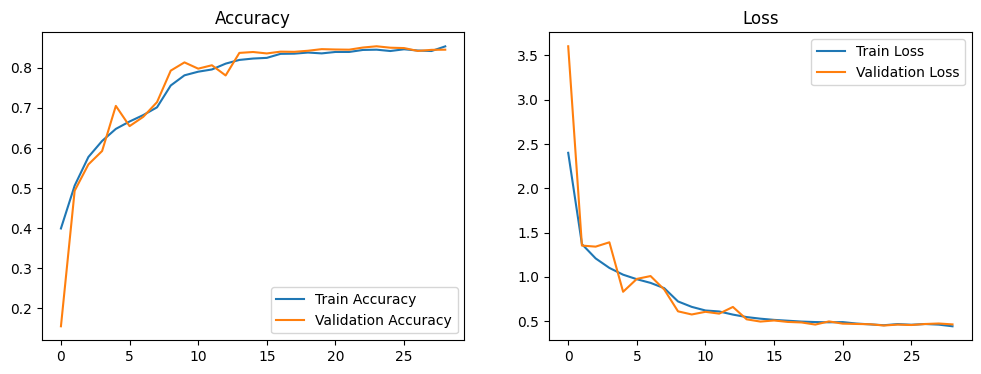

Создаем и обучаем Model 2...
Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 58s 197ms/step - accuracy: 0.6358 - loss: 1.0575 - val_accuracy: 0.8304 - val_loss: 0.5011 - learning_rate: 0.0010
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.8196 - loss: 0.5186 - val_accuracy: 0.8451 - val_loss: 0.4560 - learning_rate: 0.0010
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.8298 - loss: 0.4848 - val_accuracy: 0.8478 - val_loss: 0.4486 - learning_rate: 0.0010
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 193ms/step - accuracy: 0.8517 - loss: 0.4497 - val_accuracy: 0.8500 - val_loss: 0.4296 - learning_rate: 0.0010
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.8650 - loss: 0.4048 - val_accuracy: 0.8598 - val_loss: 0.4193 - learning_rate: 0.0010
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.8740 - loss: 0.3790 - val_accuracy: 0.8451 - val_loss: 0.4510 - learning_rate: 0.0010
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 5

Модель flower_classifier_mobilenet.h5 сохранена в saved_models\flower_classifier_mobilenet.h5


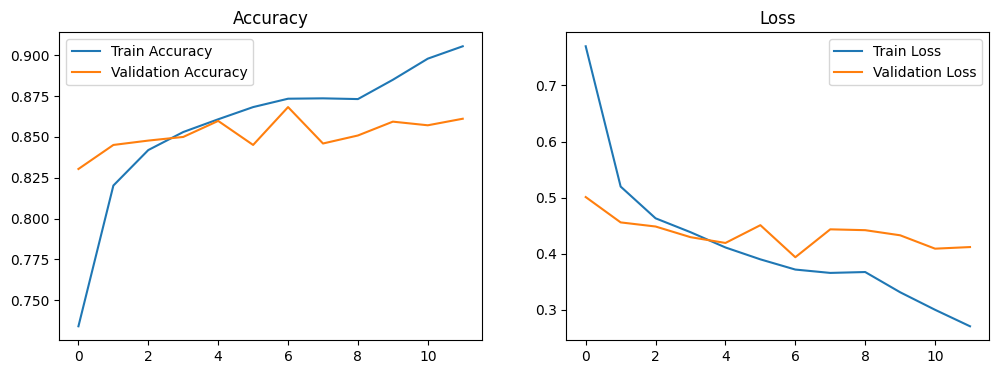


Проверка моделей:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,337,175 (58.51 MB)

 Trainable params: 5,112,071 (19.50 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 10,224,144 (39.00 MB)

Model 1 архитектура: None


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,247,191 (12.39 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 659,472 (2.52 MB)

Model 2 архитектура: None


In [17]:
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Функции для сохранения и загрузки моделей
def save_model(model, model_name):
    model_path = os.path.join('saved_models', model_name)
    model.save(model_path)
    print(f"Модель {model_name} сохранена в {model_path}")

def load_model(model_name):
    model_path = os.path.join('saved_models', model_name)
    if os.path.exists(model_path):
        print(f"Загружаем модель {model_name} из {model_path}")
        return tf.keras.models.load_model(model_path)
    return None

# Модель 1: Собственная CNN архитектура
MODEL1_NAME = 'flower_classifier_cnn.h5'


model1 = load_model(MODEL1_NAME)

if model1 is None:
    print("Создаем и обучаем Model 1...")
    model1 = build_model1()
    
    history1 = model1.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    
    save_model(model1, MODEL1_NAME)
    
    plot_history(history1)
else:
    print("Model 1 загружена из файла")

#Модель 2: Transfer Learning с MobileNetV2

MODEL2_NAME = 'flower_classifier_mobilenet.h5'

model2 = load_model(MODEL2_NAME)

if model2 is None:
    print("Создаем и обучаем Model 2...")
    model2 = build_model2()
    
    history2 = model2.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    
    save_model(model2, MODEL2_NAME)
    
    plot_history(history2)
else:
    print("Model 2 загружена из файла")

# Проверка того, что модели загружены корректно
print("\nПроверка моделей:")
print(f"Model 1 архитектура: {model1.summary()}")
print(f"Model 2 архитектура: {model2.summary()}")

Found 2240 images belonging to 7 classes.
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step

Оценка ансамбля:
              precision    recall  f1-score   support

  bellflower       0.91      0.98      0.94       320
       daisy       0.91      0.90      0.90       320
   dandelion       0.86      0.88      0.87       320
       lotus       0.92      0.85      0.88       320
        rose       0.86      0.88      0.87       320
   sunflower       0.92      0.92      0.92       320
       tulip       0.86      0.85      0.85       320

    accuracy                           0.89      2240
   macro avg       0.89      0.89      0.89      2240
weighted avg       0.89      0.89      0.89      2240



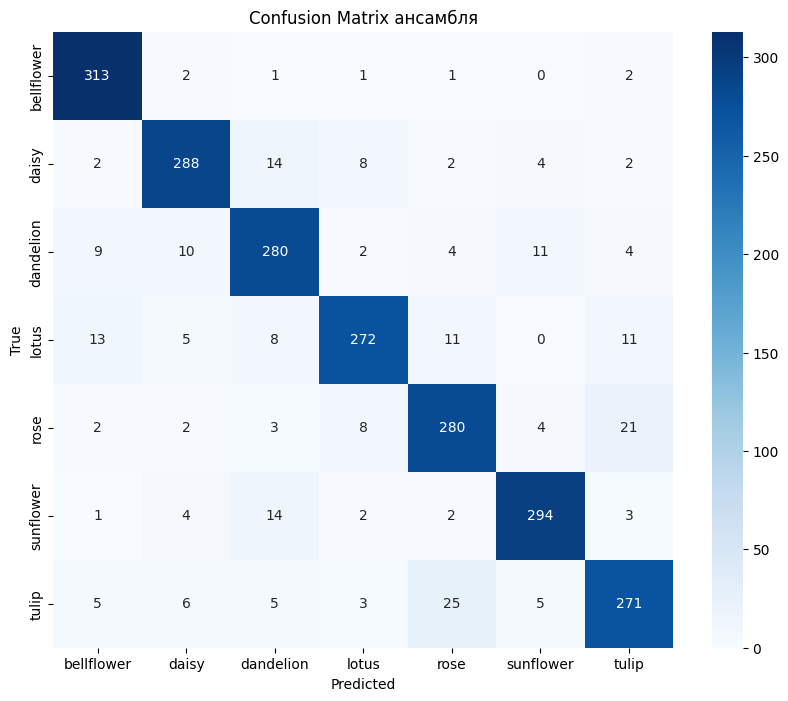


Оценка Model 1 (CNN):
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
              precision    recall  f1-score   support

  bellflower       0.92      0.96      0.94       320
       daisy       0.89      0.85      0.87       320
   dandelion       0.82      0.87      0.84       320
       lotus       0.89      0.84      0.86       320
        rose       0.78      0.79      0.78       320
   sunflower       0.91      0.91      0.91       320
       tulip       0.80      0.79      0.79       320

    accuracy                           0.86      2240
   macro avg       0.86      0.86      0.86      2240
weighted avg       0.86      0.86      0.86      2240


Оценка Model 2 (MobileNet):
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
              precision    recall  f1-score   support

  bellflower       0.89      0.94      0.91       320
       daisy       0.86      0.90      0.88       320
   dandelion       0.85      0.87      0.86       320
       lotus       0.89      0.81      0.85       320


In [18]:
class VotingEnsemble:
    def __init__(self, models):
        self.models = models
    
    def predict(self, x):
        predictions = [model.predict(x) for model in self.models]
        
        avg_predictions = np.mean(predictions, axis=0)
        return np.argmax(avg_predictions, axis=1)
    
    def evaluate(self, x, y_true):
        y_pred = self.predict(x)
        y_true = np.argmax(y_true, axis=1)
        
        print("\nОценка ансамбля:")
        print(classification_report(y_true, y_pred, target_names=classes))
        
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=classes, yticklabels=classes)
        plt.title('Confusion Matrix ансамбля')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

ensemble = VotingEnsemble([model1, model2])

val_generator_no_shuffle = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

x_val, y_val = [], []
for i in range(len(val_generator_no_shuffle)):
    x, y = val_generator_no_shuffle[i]
    x_val.append(x)
    y_val.append(y)
x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

ensemble.evaluate(x_val, y_val)

print("\nОценка Model 1 (CNN):")
y_pred1 = np.argmax(model1.predict(x_val), axis=1)
print(classification_report(np.argmax(y_val, axis=1), y_pred1, target_names=classes))

print("\nОценка Model 2 (MobileNet):")
y_pred2 = np.argmax(model2.predict(x_val), axis=1)
print(classification_report(np.argmax(y_val, axis=1), y_pred2, target_names=classes))

ensemble_acc = np.mean(ensemble.predict(x_val) == np.argmax(y_val, axis=1))
print(f"\nСравнение точности:")
print(f"- Model 1 (CNN): {np.mean(y_pred1 == np.argmax(y_val, axis=1)):.4f}")
print(f"- Model 2 (MobileNet): {np.mean(y_pred2 == np.argmax(y_val, axis=1)):.4f}")
print(f"- Ансамбль: {ensemble_acc:.4f}")